# Climate System.

A simplified 0-D, time-varying model of the Earth's energy balance:

$$\rho c_p H \frac{dT}{dt} = R -  bT$$

* $T$ is the global average surface temperature (relative to pre-industrial) [$C$]
* $b$ is the climate sensitivity parameter [$Wm^{-2} C ^{-1}$]
* $H$ is the ocean mixed layer depth [$m$]
* $R$ is radiative forcing [$Wm^{-2}$]
* $\rho$ is the density of sea water [$kgm^{-3}$]
* $c_p$ is the specific heat capacity of seawater [$Jkg^{-1} C^{-1}$]

The simple climate model is an energy balance model that accounts for feedbacks, natural variability, and an ocean to help simulate the main components that determine changes in global mean temperature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

# plt.rcParams["font.family"] = "tex-gyre"
# plt.rcParams["font.serif"] = "TeX Gyre Schola"
# plt.rcParams["font.size"] = 12

# plt.rcParams.update({
#   "text.usetex": True,
#   "font.family": "Helvetica"
# })

# Final plots
# plt.rc('text', usetex=True)


In [2]:
class ClimateSystem:
    def __init__(self):
        """
        Initialize constants and parameters
        """
        # climate sensitivity
        self.b = 2.5  # this should depend on a climate sensitivity model

        # ocean mixed layer depth (kg/m^3)
        self.H = 300

        # radiative forcing (W/m^2)
        self.R = 0.5

        # density of sea water (kg/m^3)
        self.rho = 1025

        # heat capacity of sea water (J/kg/K)
        self.c_p = 3985

        # change in time (s), this is the value for a year in seconds
        self.delta_t = 365.25*24*60*60  # seconds

        # get data
        data_and_projections = self.get_data()
        self.data = data_and_projections[0]
        self.projections = data_and_projections[1]

    def get_data(self):
        """
        Reads in data from a csv file and returns a pandas dataframe
        """

        data = pd.read_csv('data/climate_forcing_1880-2006.csv')
        projections = pd.read_csv('data/climate_forcing_projected.csv')
        return data, projections

    def get_forcing(self, key):
        """
        Returns the radiative forcing for a given key
        """
        return self.data['Year'], self.data[key]

    def get_total_forcing(self):
        """
        Returns the total radiative forcing
        """
        return self.data['Year'], self.data['Total radiative forcing [W/m2]']

    def get_forcing_projections(self, key):
        """
        Returns the radiative forcing for a given scenario
        """
        return self.projections['Year'], self.projections[key]

    def get_observed_temp(self):
        """
        Returns the observed temperature
        """
        return self.data['Year'], self.data['Observed Temperature [C]']

    def predict_temp(self, forcings, b, H):
        """
        Returns the predicted temperature for a given set of forcings
        over a time series.

        The model equation is stepped forward in time using Euler's method.
        """
        steps = len(forcings)

        # initialize temperature array
        temps = np.zeros(steps)

        # loop through time steps and solve model equation
        for i in range(steps-1):
            dTdt = (forcings[i]-b*temps[i])/(self.rho*self.c_p*H)
            temps[i+1] = temps[i]+dTdt*self.delta_t

        return temps

    def get_forcing_growth_rate(self, forcings):
        """
        Returns the growth rate of the radiative forcing
        """
        return np.gradient(forcings)

    def adapt_with_chaos(self, forcing_type):
        """
        Generates forcings for a time series using a logistic map function
        """

        years, forcings = self.get_forcing(forcing_type)

        # This forcing is from observed temperature, using it learn
        r = self.get_forcing_growth_rate(forcings)

        # get max value in forcing
        Pmax = max(forcings)

        Pn = forcings[0]

        xn = Pn/Pmax

        time_steps = len(years)

        # logistic map function
        def chaos(r, x):
            """
            xn+1 = rxn(1 − xn)

            xn is the population expressed as a fraction as the maximum possible, 
            or “doomsday” population. Therefore xn = Pn / Pmax, where Pn is the
            current population and Pmax is the maximum possible population.

            r is the growth rate
            """
            return r * x * (1 - x)

        # initialize array to store chaos values
        chaos_values = np.zeros(time_steps)

        for i in range(time_steps):
            chaos_values[i] = chaos(r[i], xn)
            xn = chaos_values[i]

        # plot chaos values
        plt.plot(years, chaos_values)
        plt.show()


No handles with labels found to put in legend.


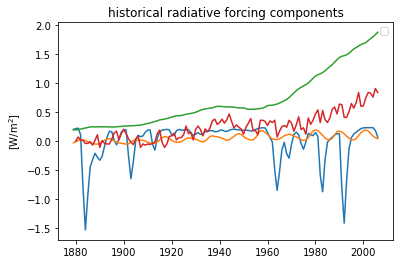

In [3]:
climate = ClimateSystem()

plt.figure()
plt.plot(*climate.get_forcing('Volcano [W/m2]'))
plt.plot(*climate.get_forcing('Solar [W/m2]'))
plt.plot(*climate.get_forcing('Anthropogenic [W/m2]'))
plt.plot(*climate.get_observed_temp())
plt.ylabel('[W/m$^2$]')
plt.title('historical radiative forcing components')
plt.legend()

## Anthropogenic effect

"Representative Concentration Pathways (RCPs) are not new, fully integrated scenarios (i.e., they are not a complete package of socioeconomic, emissions and climate projections). They are consistent sets of projections of only the components of radiative forcing that are meant to serve as input for climate modeling, pattern scaling and atmospheric chemistry modeling," according to the RCP Database.

This is the parameter we are investigating and eventually going to adapt.

### Historical Data
Let's see how much human forcing we have in the dataset

No handles with labels found to put in legend.


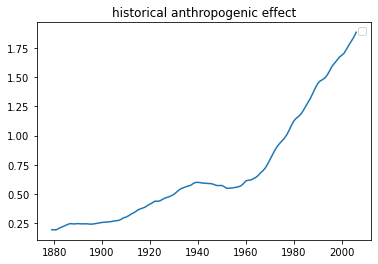

In [4]:
plt.plot(*climate.get_forcing('Anthropogenic [W/m2]'))
plt.title('historical anthropogenic effect')
plt.legend()


### Projections

No handles with labels found to put in legend.


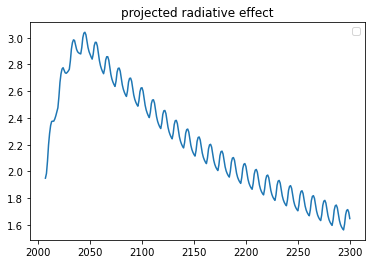

In [5]:
plt.plot(*climate.get_forcing_projections('Forcing RCP26 [W/m2]'))
plt.title('projected radiative effect')
plt.legend()


Now we can ask why the decline after the peak at sometime around 2050, it could be a collapse of the climate system. Discuss what further studies say.

## 1900 - 2300 
Total Historic data, predicted projection and observed temperature, moving further we can predicted future temp with this data

No handles with labels found to put in legend.


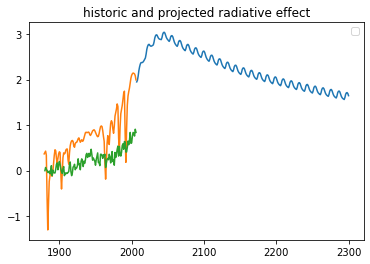

In [6]:
plt.plot(*climate.get_forcing_projections('Forcing RCP26 [W/m2]'))
plt.plot(*climate.get_total_forcing())
plt.plot(*climate.get_observed_temp())
plt.title('historic and projected radiative effect')
plt.legend()


# Best fit to data

Find the best fit for $H$ and $b$ i.e ocean mixed layer depth [$m$] and climate sensitivity [$Wm^{-2} C^{-1}$]

No handles with labels found to put in legend.


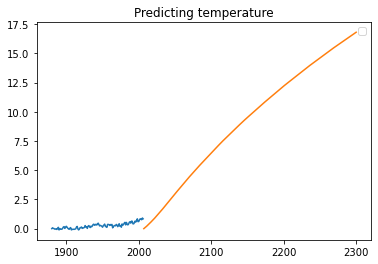

In [7]:
year, data = climate.get_forcing_projections('Forcing RCP26 [W/m2]')
plt.plot(*climate.get_observed_temp())
plt.plot(year, climate.predict_temp(data, 0, 300))
plt.title('Predicting temperature')
plt.legend()

## Using Bias to generate projections

Using the logistic map

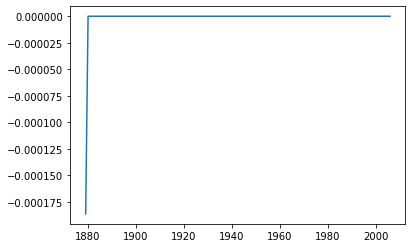

In [8]:
# year, data = climate.get_forcing_projections('Forcing RCP26 [W/m2]')
climate.adapt_with_chaos('Anthropogenic [W/m2]')

Text(0.5, 0, 'time step')

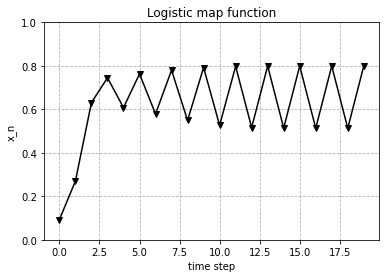

In [9]:
# Logistic map function
def chaos(r, x):
    """
    xn+1 = rxn(1 − xn)

    xn is the population expressed as a fraction as the maximum possible, 
    or “doomsday” population. Therefore xn = Pn / Pmax, where Pn is the
    current population and Pmax is the maximum possible population.

    r is the growth rate
    """
    return r * x * (1 - x)


time_step = 20
r = 3.20
initial = 0.03
initial_chaos = chaos(r, initial)

# initialize array to store chaos values
chaos_values = [initial_chaos, *np.zeros(time_step-1)]

for i in range(time_step - 1):
    chaos_values[i + 1] = chaos(r, chaos_values[i])

# plot chaos values
# set y axis to be between 0 and 1
plt.plot(chaos_values, 'kv-')
plt.ylim(0, 1)
plt.grid(linestyle = '--')
plt.title('Logistic map function')
plt.ylabel('x_n')
plt.xlabel('time step')
